In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
df['petal_area'] = df.petal_length * df.petal_width
df['sepal_area'] = df.sepal_length * df.sepal_width

In [58]:
train_validate, test = train_test_split(df, train_size = .8, random_state = 123)
train, validate = train_test_split(train_validate, random_state =123)

train.shape, validate.shape, test.shape

((90, 7), (30, 7), (30, 7))

In [59]:
scaler = MinMaxScaler()
cols = train.drop(columns = ['species']).columns.tolist()

# data needs to be split.
# .copy function makes a proper copy

train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.fit_transform(validate[cols])
test_scaled[cols] = scaler.fit_transform(test[cols])

In [60]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
86,0.647059,0.55,0.649123,0.583333,versicolor,0.457313,0.537962
82,0.382353,0.35,0.508772,0.458333,versicolor,0.300463,0.282717
109,0.794118,0.80,0.894737,1.000000,virginica,1.000000,0.795205
147,0.588235,0.50,0.736842,0.791667,virginica,0.679021,0.474525
49,0.147059,0.65,0.070175,0.041667,setosa,0.009265,0.324675


In [61]:
# fit with KMeans

X = train_scaled[['sepal_area', 'petal_area']]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
86,0.647059,0.55,0.649123,0.583333,versicolor,0.457313,0.537962,2
82,0.382353,0.35,0.508772,0.458333,versicolor,0.300463,0.282717,3
109,0.794118,0.80,0.894737,1.000000,virginica,1.000000,0.795205,0
147,0.588235,0.50,0.736842,0.791667,virginica,0.679021,0.474525,0
49,0.147059,0.65,0.070175,0.041667,setosa,0.009265,0.324675,1


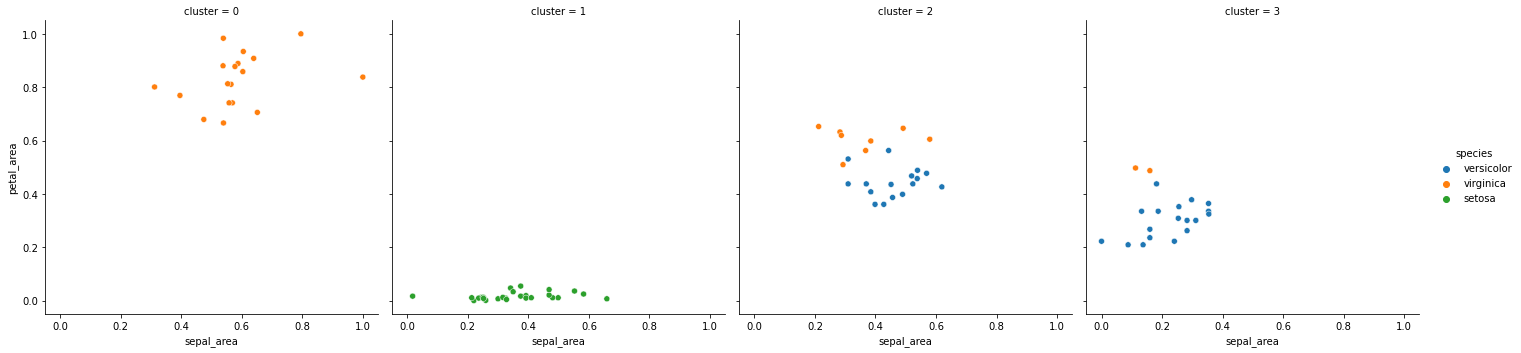

In [62]:
# visualize

sns.relplot(x = 'sepal_area', y = 'petal_area', hue = 'species', col = 'cluster', data = train_scaled)

#### Takeaway
- There are strong disctinctions between species noted in cluster 0 and cluster 3
- cluster 1 and cluster 2 are somewhat locked in the middle of the pack

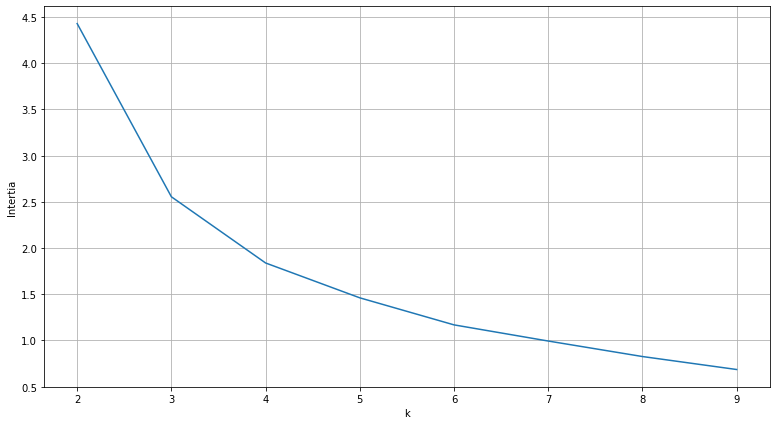

In [63]:
#def get_intertia(k):
#    return KMeans(k).fit(X).intertia_

cols = ['petal_area', 'sepal_area']
X = train_scaled[cols]

inertias = {}
for k in range (2, 10):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel = 'k', ylabel = 'Intertia', figsize = (13,7))
plt.grid()


#### looking at intertia
- There seems to be some values in k values of 3, 4, maybe 6

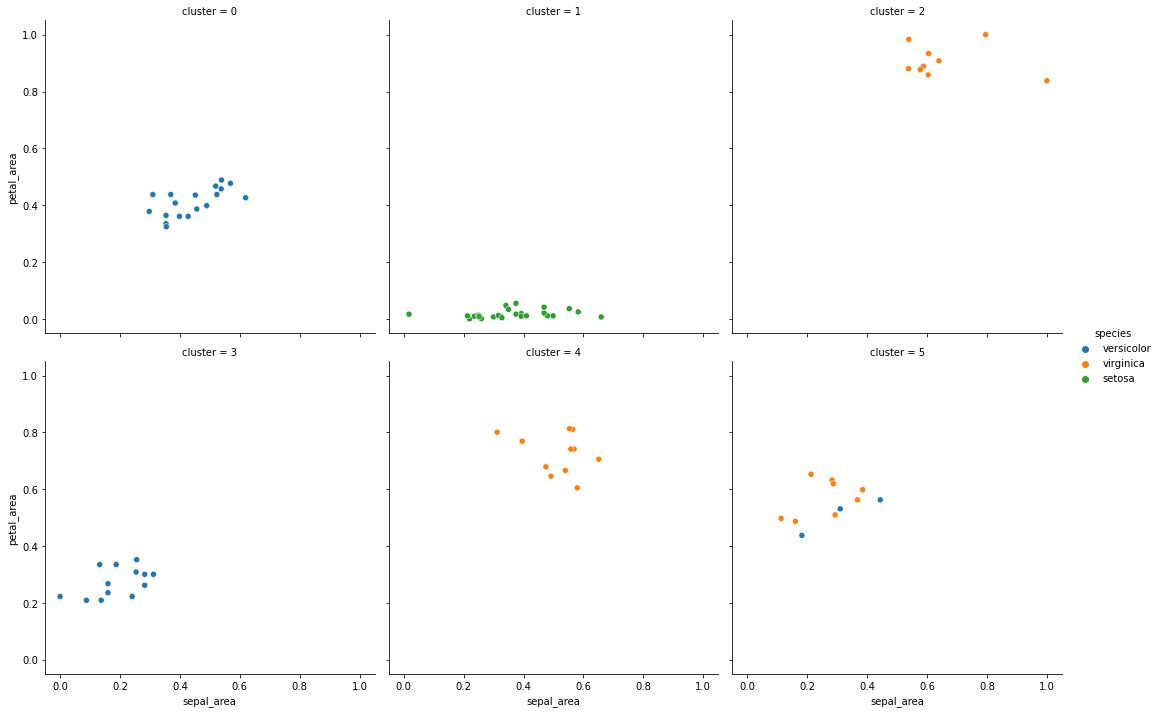

In [64]:
#fit KMeans again with new features and k value

X = train_scaled[['sepal_area', 'petal_area', 'petal_length', 'petal_width']]
kmeans = KMeans(n_clusters = 6).fit(X)

train_scaled['cluster'] = kmeans.labels_

# visualize changes made
sns.relplot(x = 'sepal_area', y= 'petal_area', hue = 'species', col="cluster", col_wrap=3, data=train_scaled)


#### Thoughts
- more feature inclusion allows for more disctinct groupings

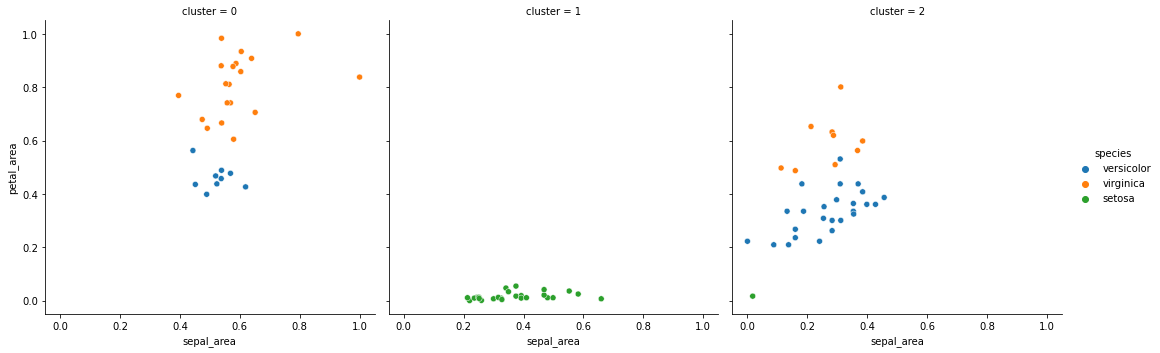

In [66]:
#fit KMeans again with new features and k value

X = train_scaled[['sepal_area', 'petal_area', 'sepal_length', 'sepal_width']]
kmeans = KMeans(n_clusters = 3).fit(X)

train_scaled['cluster'] = kmeans.labels_

# visualize changes made
sns.relplot(x = 'sepal_area', y= 'petal_area', hue = 'species', col="cluster", col_wrap=3, data=train_scaled)



#### K value at 3
- A smaller k value but with more feature inclusion
- feature selection should not be at random when creating cluster
- allows for more meaningful conclusions

In [67]:
db_name = 'mall_customers'
query = 'SELECT * FROM customers'

url = env.get_db_url(db_name)
df = pd.read_sql(query, url, index_col = 'customer_id')

# encode gender
df.gender = df.gender.apply(lambda x: 1 if x =='Male' else 0)

#split the data
train_validate, test = train_test_split(df, train_size =.8, random_state = 123)
train, validate = train_test_split(train_validate, random_state = 123)

train.shape, validate.shape, test.shape

((120, 4), (40, 4), (40, 4))

In [68]:
train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,0,54,47,59
49,0,29,40,42
25,0,54,28,14
137,0,44,73,7
177,1,58,88,15


In [69]:
# scale the datasets

# starting with empty copies to retain original splits
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

# scale the data
scaler = MinMaxScaler()
cols = train.drop(columns = ['gender']).columns.tolist()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.fit_transform(validate[cols])
test_scaled[cols] = scaler.fit_transform(validate[cols])

# add back gender column to scaled dataframes
train_scaled['gender'] = train.gender.copy()
validate_scaled['gender'] = validate.gender.copy()
test_scaled['gender'] = test.gender.copy()


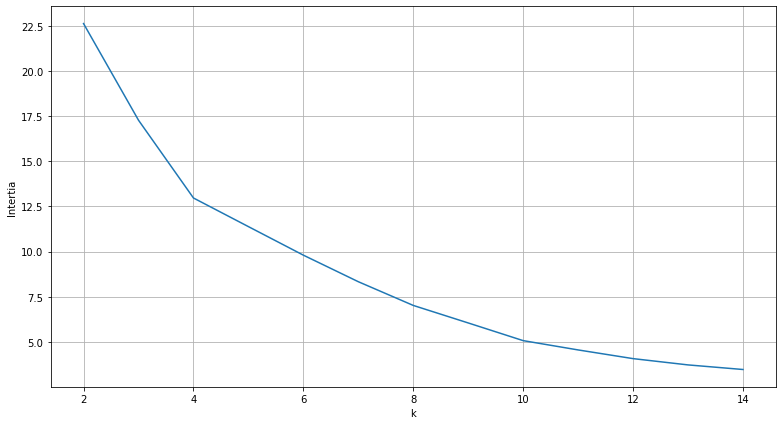

In [70]:
X = train_scaled.copy()

inertias = {}
for k in range (2, 15):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel = 'k', ylabel = 'Intertia', figsize = (13,7))
plt.grid()

#### Visuals takeaway
- inertia breaks down around k value 4 and continutes to decrease until maybe 8

In [71]:
# Fit KMeans
X = train_scaled.copy()

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

train_scaled['clusters'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,clusters
customer_id,,,,,
64,0,0.692308,0.262295,0.617021,3
49,0,0.211538,0.204918,0.436170,1
25,0,0.692308,0.106557,0.138298,3
137,0,0.500000,0.475410,0.063830,3
177,1,0.769231,0.598361,0.148936,0


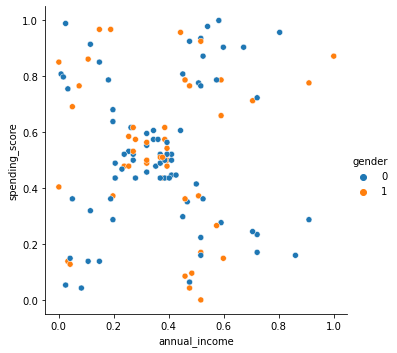

In [75]:
sns.relplot(x = 'annual_income', y= 'spending_score', hue = 'gender',data = train_scaled)

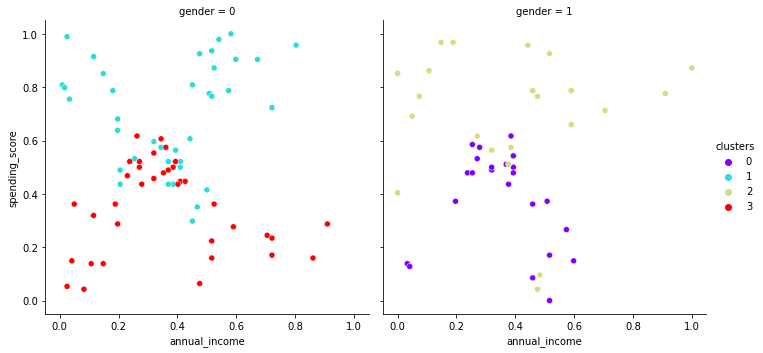

In [82]:
sns.relplot(x = 'annual_income', y = 'spending_score', col = 'gender', hue = 'clusters', data = train_scaled, palette = 'rainbow')